# Video preprocessing

In [1]:
import cv2
import os
import json
from tqdm import tqdm
from dclut import dclut
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm

from mimo_pack.preprocess.video import tif_to_video, create_video_rois, track_video_rois, rois_to_barcodes
from mimo_pack.preprocess.time import align_sync_video
from mimo_pack.plot.timeseries import stacked_lines

## Convert directory of images to video

In [2]:
img_dir = "W:\\Drew\\25-01-20_ZS02_Reach\\"

In [3]:
tif_to_video(img_dir)

100%|██████████| 51667/51667 [53:27<00:00, 16.11it/s]  


## Create barcode from video

In [2]:
vid_dir = os.path.join("D:", "SortingTemp")
vid_fname = "25-01-20_ZS02_Reach.mp4"
vid_path = os.path.join(vid_dir, vid_fname)
roi_path = os.path.join(vid_dir, "rois.json")

In [ ]:
rois = create_video_rois(vid_path)

with open(roi_path, "w") as f:
    json.dump(rois, f)

If you already created your rois, then just open them.

In [3]:
with open(roi_path, "r") as f:
    rois = json.load(f)

In [4]:
tbl_path = os.path.join(vid_dir, "25-01-20_ZS02_Reach.csv")
roi_df = track_video_rois(vid_path, table_path=tbl_path, rois=rois)

100%|██████████| 51667/51667 [04:11<00:00, 205.52it/s]


<Axes: >

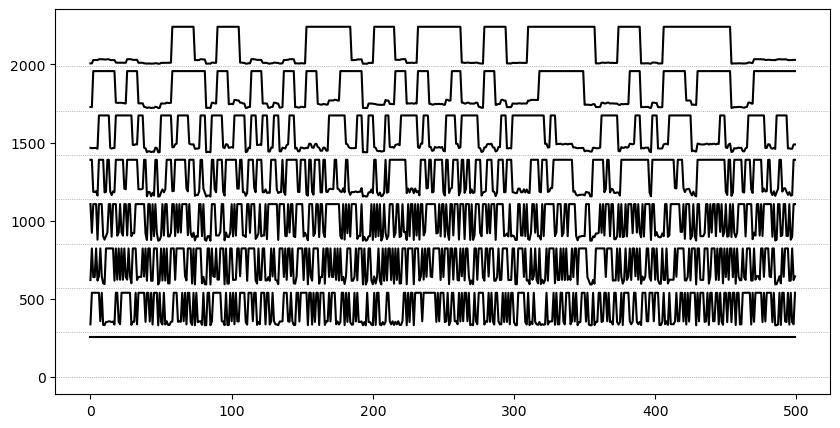

In [5]:
roi_vals = roi_df.values
fig, ax = plt.subplots(figsize=(10, 5))
stacked_lines(roi_vals[:500], sep_ratio=1.2, ax=ax)

In [6]:
barcode = rois_to_barcodes(tbl_path, roi_cols=['roi_' + str(i) for i in range(8)])


## Align with dclut reference

In [7]:
dcl_path = "D:\\SortingTemp\\25-01-20_ZS02_Reach_g0_imec0\\25-01-20_ZS02_Reach_g0_t0.imec0.ap_dclut.json"

In [ ]:
tbl_path = align_sync_video_barcode(tbl_path, dcl_path, 'barcode',  {'channel': [384]}, 'time', verbose=True)

Reading video target file
Reading recording reference file


100%|██████████| 200/200 [11:16<00:00,  3.38s/it]


Barcode detection


Deserializing barcodes: 100%|█████████▉| 11977494/11979505 [01:35<00:00, 125379.24bits/s] 


Barcodes detected: 99.90%


Aligning barcodes: 100%|█████████▉| 51644/51667 [11:12<00:00, 76.83frames/s] 


Aligned frames: 96.25%


In [10]:
vid_df = pd.read_csv(tbl_path)
vid_df

,frame,tif_file,epoch_num,frame_num,roi_0,roi_1,roi_2,roi_3,roi_4,roi_5,roi_6,roi_7,barcode,time
0,0,25-01-20_ZS02_Reach1_0.tif,1,0,254.0,51.846749,51.355954,254.000000,254.000000,46.574684,24.203498,19.647679,25,97.627533
1,1,25-01-20_ZS02_Reach1_1.tif,1,1,254.0,253.998452,254.000000,69.986280,254.000000,44.355696,24.027822,19.758439,23,97.637533
2,2,25-01-20_ZS02_Reach1_2.tif,1,2,254.0,254.000000,70.455826,254.000000,48.273657,44.964557,254.000000,41.058017,75,97.647533
3,3,25-01-20_ZS02_Reach1_3.tif,1,3,254.0,254.000000,70.423175,254.000000,48.152813,45.029114,254.000000,40.946203,75,97.657533
4,4,25-01-20_ZS02_Reach1_4.tif,1,4,254.0,254.000000,254.000000,254.000000,52.721867,46.313924,254.000000,41.620253,79,97.667567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51662,51662,25-01-20_ZS02_Reach76_2030.tif,76,2030,254.0,46.495356,26.335467,27.322409,46.838875,254.000000,254.000000,254.000000,225,6753.573967
51663,51663,25-01-20_ZS02_Reach76_2031.tif,76,2031,254.0,70.685759,254.000000,254.000000,73.058184,254.000000,254.000000,254.000000,237,6753.583967
51664,51664,25-01-20_ZS02_Reach76_2032.tif,76,2032,254.0,46.253870,25.970551,27.041921,46.466113,254.000000,254.000000,254.000000,225,6753.593967
51665,51665,25-01-20_ZS02_Reach76_2033.tif,76,2033,254.0,254.000000,254.000000,254.000000,74.154731,254.000000,254.000000,254.000000,239,6753.604000


In [ ]:
# plot video data